# CLUSTERING

**KMeans**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go




from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/training_cleaned.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,AAAP,AACP,ARAP,ARCP,CAAP,CACP,CRAP,CRCP,BYRNO,VNST,VehBCost,WarrantyCost,PurchYear,PurchMonth,PurchDay,PurchWeekDay,EngineLiters,NumCylinders,4X4,WheelDrive,NumDoors,IsBadBuy
0,326,1,1,2008.0,2.0,1,1.0,1.0,1,1.0,1.0,1,61184,1,6796.0,7555.0,10140.0,10805.0,6628.0,7535.0,9605.0,10650.0,5546,1,6100.0,533,2010.0,10.0,25.0,1,3.263482,6.0,1,1,4.0,1
1,42991,2,2,2006.0,3.0,2,2.0,2.0,1,2.0,1.0,1,92383,2,5480.0,6461.0,6418.0,7478.0,5480.0,6461.0,6418.0,7478.0,99750,1,4000.0,1630,2009.0,5.0,27.0,2,2.700000,6.0,1,1,4.0,0
2,55273,3,3,2008.0,2.0,2,3.0,3.0,2,3.0,1.0,1,45965,2,8067.0,8580.0,11073.0,11652.0,7497.0,8102.0,10721.0,11350.0,99761,2,7500.0,693,2010.0,3.0,18.0,3,5.413688,6.0,1,1,4.0,0
3,29058,4,3,2005.0,4.0,3,4.0,4.0,3,4.0,1.0,1,80169,2,4817.0,6658.0,5702.0,7691.0,4817.0,6658.0,5702.0,7691.0,99761,3,4725.0,1633,2009.0,6.0,8.0,1,3.900000,6.0,2,2,4.0,0
4,34991,5,2,2005.0,4.0,2,5.0,5.0,3,1.0,1.0,2,77372,2,5430.0,6633.0,6364.0,7664.0,5370.0,6811.0,6300.0,7856.0,20833,4,5670.0,1623,2009.0,3.0,4.0,2,3.300000,7.0,2,2,5.0,0


In [0]:
for e in df.columns:
  print(e)

RefId
PurchDate
Auction
VehYear
VehicleAge
Make
Model
Trim
SubModel
Color
Transmission
WheelType
VehOdo
Nationality
AAAP
AACP
ARAP
ARCP
CAAP
CACP
CRAP
CRCP
BYRNO
VNST
VehBCost
WarrantyCost
PurchYear
PurchMonth
PurchDay
PurchWeekDay
EngineLiters
NumCylinders
4X4
WheelDrive
NumDoors
IsBadBuy


In [0]:
sum_ = df.isnull().sum()
sum_[sum_ != 0]

Series([], dtype: int64)

In [0]:
df_clus = df[['AAAP', 'AACP', 'ARAP', 'ARCP', 'CAAP', 'CACP', 
             'CRAP', 'CRCP', 'VehBCost', 'WarrantyCost', 'VehOdo']]
df_clus = df_clus[0:20000]

In [0]:
df_1 = df_clus[['VehOdo', 'VehBCost', 'AAAP']]
df_2 = df_clus[['VehOdo', 'VehBCost', 'AAAP', 'ARAP']]
df_3 = df_clus[['AAAP', 'ARAP', 'VehBCost']]
df_4 = df_clus[['WarrantyCost', 'VehOdo', 'VehBCost']]
df_5 = df_clus[['WarrantyCost', 'AAAP', 'ARAP']]
#df_6 = df_clus[['AAAP', 'ARAP', 'Trend']] ADD TO DATA_FRAMES

data_frames = [df_1, df_2, df_3, df_4, df_5]

## K-Means with MinMax


In [0]:
scaler = MinMaxScaler()
z_scaled_df = []
for x in data_frames:
  z_scaled_df.append(scaler.fit_transform(x.values))

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [0]:
results = {}
for i, x in enumerate(z_scaled_df):
  results[str(i)] = []

choices_k = []
for k in range(2, 17):
  choices_k.append(k)

for i, x in enumerate(z_scaled_df):
  for k in choices_k:
    results[str(i)].append(KMeans(n_clusters=k).fit(x))
  print(i)

0
1
2
3
4


In [0]:
to_plot_idx = 2
to_plot = data_frames[to_plot_idx]
lab = []
for e in to_plot.columns:
  lab.append(e)
x = lab[0]
y = lab[1]
z = lab[2]
k_plot = 6

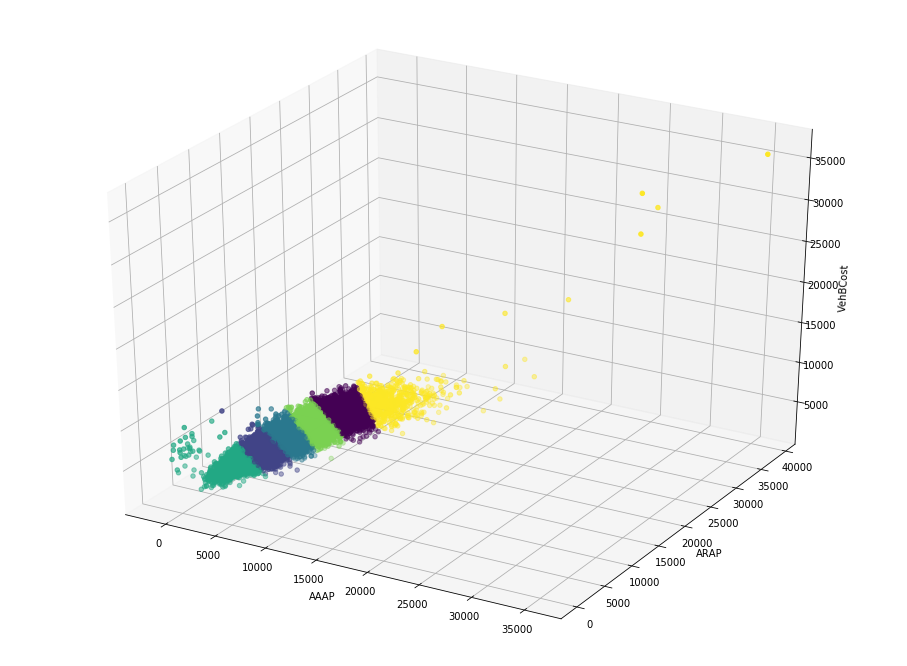

In [0]:

fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection='3d')
ax.scatter(to_plot[x],
           to_plot[y],
           to_plot[z],
           c=results[str(to_plot_idx)][k_plot-2].labels_, marker='o')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

In [0]:
fig = go.Figure(data=[go.Scatter3d(
    x=data_frames[to_plot_idx][x],
    y=data_frames[to_plot_idx][y],
    z=data_frames[to_plot_idx][z],
    mode='markers',
    marker=dict(
        size=2,
        color=results[str(to_plot_idx)][k_plot-2].labels_,                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=1
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                 scene = dict(
                     xaxis_title= x,
                     yaxis_title= y,
                     zaxis_title= z)
                 )
fig.show()

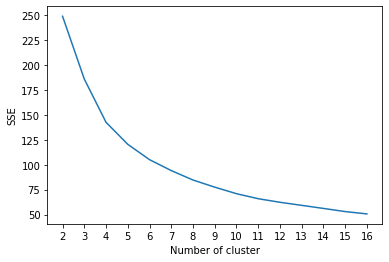

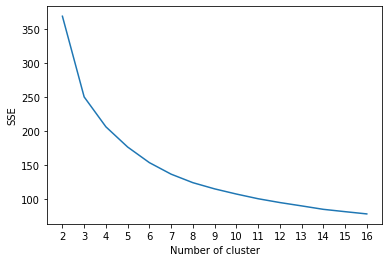

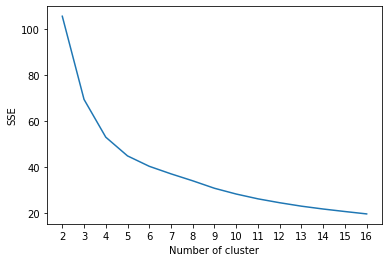

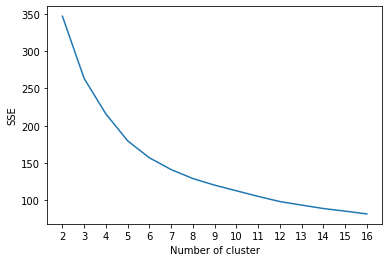

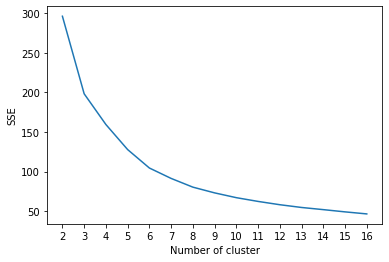

In [0]:
sse = {}

for i, e in enumerate(z_scaled_df):
  sse[str(i)] = {}

for i, e in enumerate(z_scaled_df):
  for k in choices_k:
      sse[str(i)][str(k)] = results[str(i)][k - 2].inertia_# Inertia: Sum of distances of samples to their closest cluster center
  plt.figure()

  plt.plot(list(sse[str(i)].keys()), list(sse[str(i)].values()))

  plt.xlabel("Number of cluster")

  plt.ylabel("SSE")

  plt.show()

In [0]:
silu = {}

for idx, e in enumerate(z_scaled_df):
  silu[str(idx)] = []

for idx, e in enumerate(z_scaled_df):
  for i in range(5, 7):
    silu[str(idx)].append(silhouette_score(z_scaled_df[idx], results[str(idx)][i-2].labels_, metric = 'euclidean'))
  print("end data frame ", idx)

end data frame  0
end data frame  1
end data frame  2
end data frame  3
end data frame  4


In [0]:
print(sse['0']['2'])
print(round(sse['0']['2']))

248.7912717253369
249.0


In [0]:
import plotly.graph_objects as go

headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['','<b>k = 5 => <SSE, Silohuette></b>','<b>k = 6 => <SSE, Silohuette></b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      ['DF1', 'DF2', 'DF3', 'DF4', 'DF5', 'DF6'],
      ["<" + str(round(sse['0']['5'])) + ", %.3f" % silu['0'][0] + ">",
       "<" + str(round(sse['1']['5'])) + ", %.3f" % silu['1'][0] + ">",
       "<" + str(round(sse['2']['5'])) + ", %.3f" % silu['2'][0] + ">",
       "<" + str(round(sse['3']['5'])) + ", %.3f" % silu['3'][0] + ">",
       "<" + str(round(sse['4']['5'])) + ", %.3f" % silu['4'][0] + ">",],
       #"<" + str(round(sse['5']['5'])) + ", %.3f" % silu['5'][0] + ">",],
      ["<" + str(round(sse['0']['6'])) + ", %.3f" % silu['0'][1] + ">",
       "<" + str(round(sse['1']['6'])) + ", %.3f" % silu['1'][1] + ">",
       "<" + str(round(sse['2']['6'])) + ", %.3f" % silu['2'][1] + ">",
       "<" + str(round(sse['3']['6'])) + ", %.3f" % silu['3'][1] + ">",
       "<" + str(round(sse['4']['6'])) + ", %.3f" % silu['4'][1] + ">",]],
       #"<" + str(round(sse['5']['6'])) + ", %.3f" % silu['5'][1] + ">",]],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor]*5],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])

fig.show()

Per adesso i migliori sono:
- VehBCost, AAAP, ARAP, k = 5 e 6, silouhette = 0.328\~0.294, SSE = 40\~45